In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [32]:
# Fixed parameters
S0 = 100
K = 80
r = 0.05
q = 0.01
sig = 0.3
T = 1.0

In [33]:
# model under consideration
model = 'LogNormal'

In [34]:
def lognormal(S, r, q, sig, S0, T):
    
    f = np.exp(-0.5*((np.log(S/S0)-(r-q-sig**2/2)*T)/(sig*np.sqrt(T)))**2)/(sig*S*np.sqrt(2*np.pi*T))
    return f

In [35]:
# plotting lognormal density f(S|S0) for various S0
m = 1500
S = np.zeros((m,1))
for i in range(m):
    S[i] = 0.25+i*0.25
    
f_50  = lognormal(S, r, q ,sig, 50, T)
f_100 = lognormal(S, r, q ,sig, 100, T)
f_150 = lognormal(S, r, q ,sig, 150, T)
f_200 = lognormal(S, r, q ,sig, 200, T)

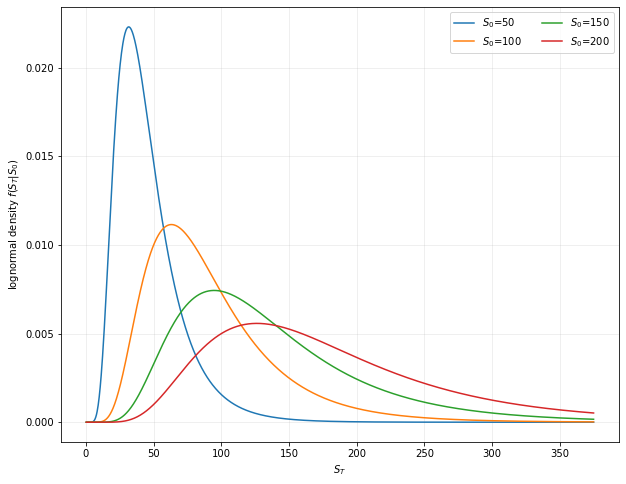

In [16]:
fig = plt.figure(figsize=(10,8))
labels = []

plt.plot(S, f_50, color = 'C0')
labels.append('$S_0$=' + str(50))

plt.plot(S, f_100, color = 'C1')
labels.append('$S_0$=' + str(100))

plt.plot(S, f_150, color = 'C2')
labels.append('$S_0$=' + str(150))

plt.plot(S, f_200, color = 'C3')

labels.append('$S_0$=' + str(200))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)

plt.xlabel('$S_T$')
plt.ylabel('lognormal density $f(S_T|S_0)$')
plt.show()

In [36]:
def evaluateIntegral(*args):
    r   = args[0]
    q   = args[1]
    S0  = args[2]
    K   = args[3]
    sig = args[4]
    T   = args[5]
    N   = args[6]
    dS  = args[7]
    
    #discount factor
    df = np.exp(-r*T)
    
    #=======================================================
    # evaluation of the integral using Trapezoidal method
    
    # Calls & Puts are different
    #=======================================================
    
    # Calls -- integrate form K to B
    S = np.zeros((N,1))
    
    for j in range(N):
        S[j] = K+j*dS
        
    tmp = lognormal(S, r, q, sig, S0, T)
    sumC = 0
    for j in range(N):
        if j == 0:
            wj = dS/2
        else:
            wj = dS
        sumC += (S[j]-K)*tmp[j]*wj
    c0_KT = df*sumC
    
    # Put -- intgrate form 0 to K
    S = np.zeros((N,1))
    eta = K/N
    print(eta)
    
    for j in range(N):
        S[j] = 0.1+j*eta
        
    tmp = lognormal(S, r, q, sig, S0, T)
    sumP = 0
    for j in range(N):
        if j == 0:
            wj = eta/2
        else:
            wj = eta
        sumP += (K-S[j])*tmp[j]*wj
    p0_KT = df*sumP
    
    return p0_KT, c0_KT

In [37]:
#step-size
dS = 0.1

# number of grid points
n = 6
N = 2**n
B = K + N*dS

start_time= time.time()
print(' ')
print('===================')
print('Model is %s' % model)
print('===================')
arg = (r, q, S0, K, sig, T, N, dS)
p0_KT, c0_KT = evaluateIntegral(*arg)
print(p0_KT, c0_KT)
elapsed_time=time.time()-start_time
print(elapsed_time)

 
Model is LogNormal
1.25
[2.70710456] [0.25903577]
0.0029942989349365234
